In [1]:
import yfinance as yf
import pandas as pd
from datetime import date

# Define the stock and the time period
ticker_symbol = "RELIANCE.NS"
start_date = "2020-01-01"
end_date = date.today().strftime("%Y-%m-%d")
try:
    print(f"Downloading 5 years of stock data for {ticker_symbol}...")
    stock_df = yf.download(ticker_symbol, start=start_date, end=end_date)

    if not stock_df.empty:
        file_path = "reliance_stock_data_5_years.csv"
        stock_df.to_csv(file_path)
        print(f"✅ Success! Data downloaded and saved to '{file_path}'")
        print(f"Data shape: {stock_df.shape}")
        display(stock_df.tail())
    else:
        print("❌ Download failed. The returned data was empty.")

except Exception as e:
    print(f"An error occurred: {e}")

/tmp/ipykernel_2363/1613629470.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_df = yf.download(ticker_symbol, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed

✅ Success! Data downloaded and saved to 'reliance_stock_data_5_years.csv'
Data shape: (1466, 5)


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2025-11-24,1535.900024,1550.000000,1531.800049,1550.000000,18433951
2025-11-25,1539.699951,1559.599976,1525.099976,1535.900024,15033482
2025-11-26,1569.900024,1571.599976,1540.500000,1542.300049,14054299
2025-11-27,1563.400024,1575.500000,1556.000000,1575.000000,9794643
2025-11-28,1567.500000,1581.300049,1563.000000,1568.000000,8959508


In [2]:
!pip install gnews

In [3]:
import pandas as pd
from gnews import GNews
import time
from datetime import datetime

# This list will store all the articles we find
all_news = []
start_year = 2020
end_year = datetime.now().year

print(f"Starting deep news search from {start_year} to {end_year}. This will take a long time...")

# Loop through each year and each month
for year in range(start_year, end_year + 1):
    for month in range(1, 13):
        # Stop if we are in the future
        if year == end_year and month > datetime.now().month:
            break
            
        print(f"Fetching news for month: {year}-{month:02d}...")
        
        # Define the start and end date for the current month
        start_date = (year, month, 1)
        if month == 12:
            end_date = (year + 1, 1, 1)
        else:
            end_date = (year, month + 1, 1)
            
        # Initialize GNews for this specific time period
        google_news = GNews(language='en', country='IN', start_date=start_date, end_date=end_date)
        
        # Get the news and add it to our master list
        monthly_news = google_news.get_news('Reliance Industries')
        if monthly_news:
            all_news.extend(monthly_news)
        
        # Be polite to the server and wait 1 second between requests
        time.sleep(1)

# --- Process the final, large dataset ---
if all_news:
    news_df = pd.DataFrame(all_news)
    
    # Clean up and save the data
    news_df = news_df[['published date', 'title', 'publisher']]
    news_df.rename(columns={'published date': 'date', 'publisher': 'source'}, inplace=True)
    
    file_path = "reliance_news_data_FULL.csv"
    news_df.to_csv(file_path, index=False)
    
    print(f"\n✅ FULL news download complete! Data saved to '{file_path}'")
    print(f"Total articles found: {len(news_df)}")
    display(news_df.head())
else:
    print("❌ No articles were found with the deep search.")

Starting deep news search from 2020 to 2025. This will take a long time...
Fetching news for month: 2020-01...


Fetching news for month: 2020-02...


Fetching news for month: 2020-03...


Fetching news for month: 2020-04...


Fetching news for month: 2020-05...


Fetching news for month: 2020-06...


Fetching news for month: 2020-07...


Fetching news for month: 2020-08...


Fetching news for month: 2020-09...


Fetching news for month: 2020-10...


Fetching news for month: 2020-11...


Fetching news for month: 2020-12...


Fetching news for month: 2021-01...


Fetching news for month: 2021-02...


Fetching news for month: 2021-03...


Fetching news for month: 2021-04...


Fetching news for month: 2021-05...


Fetching news for month: 2021-06...


Fetching news for month: 2021-07...


Fetching news for month: 2021-08...


Fetching news for month: 2021-09...


Fetching news for month: 2021-10...


Fetching news for month: 2021-11...


Fetching news for month: 2021-12...


Fetching news for month: 2022-01...


Fetching news for month: 2022-02...


Fetching news for month: 2022-03...


Fetching news for month: 2022-04...


Fetching news for month: 2022-05...


Fetching news for month: 2022-06...


Fetching news for month: 2022-07...


Fetching news for month: 2022-08...


Fetching news for month: 2022-09...


Fetching news for month: 2022-10...


Fetching news for month: 2022-11...


Fetching news for month: 2022-12...


Fetching news for month: 2023-01...


Fetching news for month: 2023-02...


Fetching news for month: 2023-03...


Fetching news for month: 2023-04...


Fetching news for month: 2023-05...


Fetching news for month: 2023-06...


Fetching news for month: 2023-07...


Fetching news for month: 2023-08...


Fetching news for month: 2023-09...


Fetching news for month: 2023-10...


Fetching news for month: 2023-11...


Fetching news for month: 2023-12...


Fetching news for month: 2024-01...


Fetching news for month: 2024-02...


Fetching news for month: 2024-03...


Fetching news for month: 2024-04...


Fetching news for month: 2024-05...


Fetching news for month: 2024-06...


Fetching news for month: 2024-07...


Fetching news for month: 2024-08...


Fetching news for month: 2024-09...


Fetching news for month: 2024-10...


Fetching news for month: 2024-11...


Fetching news for month: 2024-12...


Fetching news for month: 2025-01...


Fetching news for month: 2025-02...


Fetching news for month: 2025-03...


Fetching news for month: 2025-04...


Fetching news for month: 2025-05...


Fetching news for month: 2025-06...


Fetching news for month: 2025-07...


Fetching news for month: 2025-08...


Fetching news for month: 2025-09...


Fetching news for month: 2025-10...


Fetching news for month: 2025-11...



✅ FULL news download complete! Data saved to 'reliance_news_data_FULL.csv'
Total articles found: 4994


,date,title,source
0,"Tue, 21 Jan 2020 08:00:00 GMT",Mukesh Ambani's Reliance Industries is India's...,"{'href': 'https://www.livemint.com', 'title': ..."
1,"Thu, 02 Jan 2020 08:00:00 GMT",Reliance Industries is starting to roll out it...,"{'href': 'https://www.businessinsider.com', 't..."
2,"Mon, 06 Jan 2020 08:00:00 GMT",Is 2020 The Year That Reliance Becomes India's...,"{'href': 'https://variety.com', 'title': 'Vari..."
3,"Fri, 17 Jan 2020 08:00:00 GMT",Reliance Industries posts record Q3 profit at ...,"{'href': 'https://www.businesstoday.in', 'titl..."
4,"Tue, 07 Jan 2020 08:00:00 GMT",Reliance refers to start-up playbook to grow J...,"{'href': 'https://www.business-standard.com', ..."


In [4]:
import pandas as pd

file_path = "reliance_stock_data_5_years.csv"

print("Starting the one-time fix for the stock data CSV file...")

try:
    # Step 1: Load the messy CSV file using our robust command
    clean_df = pd.read_csv(
        file_path,
        index_col=0,
        parse_dates=True,
        skiprows=[1, 2]
    )
    clean_df.index.name = 'Date'
    print(" -> Successfully loaded the messy data into memory.")

    # Step 2: Save the clean DataFrame back to the SAME file path
    # This will OVERWRITE the old, messy file with a clean one.
    clean_df.to_csv(file_path)
    print(f" -> Successfully saved a clean version back to '{file_path}'.")

    print("\n✅✅✅ PERMANENT FIX COMPLETE ✅✅✅")
    print("The stock data CSV file is now permanently fixed. You will not see this error again.")

except Exception as e:
    print(f"An error occurred during the fix: {e}")

Starting the one-time fix for the stock data CSV file...
 -> Successfully loaded the messy data into memory.
 -> Successfully saved a clean version back to 'reliance_stock_data_5_years.csv'.

✅✅✅ PERMANENT FIX COMPLETE ✅✅✅
The stock data CSV file is now permanently fixed. You will not see this error again.


In [5]:
!conda install -c conda-forge nltk -y

CI detected...
By accessing https://repo.anaconda.com/pkgs/main via CI for this repository you 
acknowledge and agree to the Terms of Service:
ANACONDA TERMS OF SERVICE
Effective Date: July 15, 2025

See https://anaconda.com/legal/terms/terms-of-service
By accessing https://repo.anaconda.com/pkgs/r via CI for this repository you 
acknowledge and agree to the Terms of Service:
ANACONDA TERMS OF SERVICE
Effective Date: July 15, 2025

See https://anaconda.com/legal/terms/terms-of-service
2 channel Terms of Service accepted
Retrieving notices: - 

\ 

done


Channels:
 - conda-forge
 - defaults
Platform: linux-64

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

done
Solving environment: \ 

| 

done




==> WARNING: A newer version of conda exists. <==
    current version: 25.9.1
    latest version: 25.11.0

Please update conda by running

    $ conda update -n base -c defaults conda





## Package Plan ##

  environment location: /usr/share/miniconda

  added / updated specs:
    - nltk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.11.12 |       hbd8a1cb_0         149 KB  conda-forge
    certifi-2025.11.12         |     pyhd8ed1ab_0         153 KB  conda-forge
    conda-25.11.0              |  py313h78bf25f_0         1.2 MB  conda-forge
    joblib-1.5.2               |     pyhd8ed1ab_0         219 KB  conda-forge
    nltk-3.9.2                 |     pyhcf101f3_1         1.1 MB  conda-forge
    openssl-3.6.0              |       h26f9b46_0         3.0 MB  conda-forge
    regex-2025.11.3            |  py313h07c4f96_1         402 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         6.2 MB

The following NEW packages will be INSTALLED:

  joblib             conda-

openssl-3.6.0        | 3.0 MB    |                                       |   0% 
conda-25.11.0        | 1.2 MB    |                                       |   0% 

nltk-3.9.2           | 1.1 MB    |                                       |   0% 


regex-2025.11.3      | 402 KB    |                                       |   0% 



joblib-1.5.2         | 219 KB    |                                       |   0% 




certifi-2025.11.12   | 153 KB    |                                       |   0% 





ca-certificates-2025 | 149 KB    |                                       |   0% 



nltk-3.9.2           | 1.1 MB    | 5                                     |   1% 


conda-25.11.0        | 1.2 MB    | 4                                     |   1% 


openssl-3.6.0        | 3.0 MB    | 1                                     |   1% 





joblib-1.5.2         | 219 KB    | ##6                                   |   7% 


regex-2025.11.3      | 402 KB    | ##################################### | 100% 


regex-2025.11.3      | 402 KB    | ##################################### | 100% 

nltk-3.9.2           | 1.1 MB    | ##################################### | 100% 
conda-25.11.0        | 1.2 MB    | ##################################### | 100% 





joblib-1.5.2         | 219 KB    | ##################################### | 100% 




certifi-2025.11.12   | 153 KB    | ###8                                  |  10% 




openssl-3.6.0        | 3.0 MB    | ######################4               |  61% 





ca-certificates-2025 | 149 KB    | ###9                                  |  11% 





ca-certificates-2025 | 149 KB    | ##################################### | 100% 

openssl-3.6.0        | 3.0 MB    | ##################################### | 100% 





joblib-1.5.2         | 219 KB    | ##################################### | 100% 



joblib-1.5.2         | 219 KB    | ##################################### | 100% 




certifi-2025.11.12   | 153 KB    | ##################################### | 100% 




certifi-2025.11.12   | 153 KB    | ##################################### | 100% 





ca-certificates-2025 | 149 KB    | ##################################### | 100% 





ca-certificates-2025 | 149 KB    | ##################################### | 100% 



nltk-3.9.2           | 1.1 MB    | ##################################### | 100% 

nltk-3.9.2           | 1.1 MB    | ##################################### | 100% 


conda-25.11.0        | 1.2 MB    | ##################################### | 100% 

                                                                                

                                                                                


                                                                                



                                                                                




                                                                                






Preparing transaction: - 

done
Verifying transaction: | 

/ 

done
Executing transaction: \ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

done


In [6]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# --- NLTK Setup ---
# This directly downloads the required resources.
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
# --------------------

# Initialize the tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    Cleans a text string by making it lowercase, removing punctuation,
    numbers, stopwords, and then lemmatizing the words.
    """
    if not isinstance(text, str):
        return ""
        
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    words = text.lower().split()
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return " ".join(cleaned_words)

print("✅ The clean_text function is now ready to use.")

[nltk_data] Downloading package stopwords to /home/runner/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/runner/nltk_data...


[nltk_data] Downloading package omw-1.4 to /home/runner/nltk_data...


✅ The clean_text function is now ready to use.


In [7]:
import pandas as pd

# Load the full news dataset from the CSV file
file_path = "reliance_news_data_FULL.csv"
news_df = pd.read_csv(file_path)

# Apply our cleaning function to the 'title' column
print("Cleaning all news headlines... this may take a minute.")
news_df['cleaned_title'] = news_df['title'].apply(clean_text)
print("✅ Text cleaning complete.")

# Display the original and cleaned titles to see the result
display(news_df[['title', 'cleaned_title']].head())

Cleaning all news headlines... this may take a minute.


✅ Text cleaning complete.


,title,cleaned_title
0,Mukesh Ambani's Reliance Industries is India's...,mukesh ambanis reliance industry india answer ...
1,Reliance Industries is starting to roll out it...,reliance industry starting roll new ecommerce ...
2,Is 2020 The Year That Reliance Becomes India's...,year reliance becomes india digital champion v...
3,Reliance Industries posts record Q3 profit at ...,reliance industry post record q profit r crore...
4,Reliance refers to start-up playbook to grow J...,reliance refers startup playbook grow jio inte...


In [8]:
import os
import shutil
from pathlib import Path

# Define the cache directory
cache_dir = Path.home() / ".cache" / "huggingface"

try:
    if os.path.exists(cache_dir):
        print(f"Found cache directory at: {cache_dir}")
        shutil.rmtree(cache_dir)
        print("✅ Hugging Face cache has been cleared successfully.")
    else:
        print("Cache directory not found, no action needed.")

except Exception as e:
    print(f"An error occurred while clearing the cache: {e}")

Cache directory not found, no action needed.


In [9]:
import pandas as pd
import torch
# --- CHANGE 1: Import the specific BERT model class ---
from transformers import AutoTokenizer, BertForSequenceClassification

# --- 1. Load the FinBERT Model and Tokenizer ---
print("Loading FinBERT model and tokenizer...")
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
# --- CHANGE 2: Use the specific class to load the model ---
model = BertForSequenceClassification.from_pretrained("ProsusAI/finbert")
print("✅ Model and tokenizer loaded.")

# --- 2. Load Your Cleaned News Data ---
file_path = "reliance_news_data_FULL.csv"
news_df = pd.read_csv(file_path)
news_df.dropna(subset=['title'], inplace=True)
news_df['cleaned_title'] = news_df['title'].apply(clean_text)

# --- 3. Define a Function for Batch Sentiment Analysis ---
def get_finbert_sentiments(text_list):
    inputs = tokenizer(text_list, padding=True, truncation=True, return_tensors="pt", max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    sentiment_labels = [model.config.id2label[label_id] for label_id in torch.argmax(predictions, dim=1).tolist()]
    return sentiment_labels

# --- 4. Process the Headlines in Batches ---
print("\nStarting sentiment analysis with FinBERT. This will take a very long time...")
batch_size = 64
all_sentiments = []
titles_to_process = news_df['cleaned_title'].tolist()

for i in range(0, len(titles_to_process), batch_size):
    batch = titles_to_process[i:i + batch_size]
    sentiments = get_finbert_sentiments(batch)
    all_sentiments.extend(sentiments)
    print(f"  Processed {min(i + batch_size, len(titles_to_process))}/{len(titles_to_process)} headlines...")

# --- 5. Add Sentiments to DataFrame ---
news_df['finbert_sentiment'] = all_sentiments
print("\n✅ FinBERT sentiment analysis complete.")
display(news_df[['cleaned_title', 'finbert_sentiment']].head())

# Save the results to a new CSV
news_df.to_csv("reliance_news_with_finbert_sentiment.csv", index=False)
print("✅ Results have been saved to 'reliance_news_with_finbert_sentiment.csv'")

2025-11-30 03:10:27.701153: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-30 03:10:27.750810: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2025-11-30 03:10:29.058910: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


11/30/2025 03:10:29 AM - Failed to extract font properties from /usr/share/fonts/truetype/noto/NotoColorEmoji.ttf: In FT2Font: Can not load face (unknown file format; error code 0x2)


11/30/2025 03:10:29 AM - generated new fontManager


Loading FinBERT model and tokenizer...


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

✅ Model and tokenizer loaded.



Starting sentiment analysis with FinBERT. This will take a very long time...


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

  Processed 64/4994 headlines...


  Processed 128/4994 headlines...


  Processed 192/4994 headlines...


  Processed 256/4994 headlines...


  Processed 320/4994 headlines...


  Processed 384/4994 headlines...


  Processed 448/4994 headlines...


  Processed 512/4994 headlines...


  Processed 576/4994 headlines...


  Processed 640/4994 headlines...


  Processed 704/4994 headlines...


  Processed 768/4994 headlines...


  Processed 832/4994 headlines...


  Processed 896/4994 headlines...


  Processed 960/4994 headlines...


  Processed 1024/4994 headlines...


  Processed 1088/4994 headlines...


  Processed 1152/4994 headlines...


  Processed 1216/4994 headlines...


  Processed 1280/4994 headlines...


  Processed 1344/4994 headlines...


  Processed 1408/4994 headlines...


  Processed 1472/4994 headlines...


  Processed 1536/4994 headlines...


  Processed 1600/4994 headlines...


  Processed 1664/4994 headlines...


  Processed 1728/4994 headlines...


  Processed 1792/4994 headlines...


  Processed 1856/4994 headlines...


  Processed 1920/4994 headlines...


  Processed 1984/4994 headlines...


  Processed 2048/4994 headlines...


  Processed 2112/4994 headlines...


  Processed 2176/4994 headlines...


  Processed 2240/4994 headlines...


  Processed 2304/4994 headlines...


  Processed 2368/4994 headlines...


  Processed 2432/4994 headlines...


  Processed 2496/4994 headlines...


  Processed 2560/4994 headlines...


  Processed 2624/4994 headlines...


  Processed 2688/4994 headlines...


  Processed 2752/4994 headlines...


  Processed 2816/4994 headlines...


  Processed 2880/4994 headlines...


  Processed 2944/4994 headlines...


  Processed 3008/4994 headlines...


  Processed 3072/4994 headlines...


  Processed 3136/4994 headlines...


  Processed 3200/4994 headlines...


  Processed 3264/4994 headlines...


  Processed 3328/4994 headlines...


  Processed 3392/4994 headlines...


  Processed 3456/4994 headlines...


  Processed 3520/4994 headlines...


  Processed 3584/4994 headlines...


  Processed 3648/4994 headlines...


  Processed 3712/4994 headlines...


  Processed 3776/4994 headlines...


  Processed 3840/4994 headlines...


  Processed 3904/4994 headlines...


  Processed 3968/4994 headlines...


  Processed 4032/4994 headlines...


  Processed 4096/4994 headlines...


  Processed 4160/4994 headlines...


  Processed 4224/4994 headlines...


  Processed 4288/4994 headlines...


  Processed 4352/4994 headlines...


  Processed 4416/4994 headlines...


  Processed 4480/4994 headlines...


  Processed 4544/4994 headlines...


  Processed 4608/4994 headlines...


  Processed 4672/4994 headlines...


  Processed 4736/4994 headlines...


  Processed 4800/4994 headlines...


  Processed 4864/4994 headlines...


  Processed 4928/4994 headlines...


  Processed 4992/4994 headlines...
  Processed 4994/4994 headlines...

✅ FinBERT sentiment analysis complete.


,cleaned_title,finbert_sentiment
0,mukesh ambanis reliance industry india answer ...,neutral
1,reliance industry starting roll new ecommerce ...,neutral
2,year reliance becomes india digital champion v...,neutral
3,reliance industry post record q profit r crore...,positive
4,reliance refers startup playbook grow jio inte...,neutral


✅ Results have been saved to 'reliance_news_with_finbert_sentiment.csv'


In [10]:
import pandas as pd
import numpy as np

# --- 1. Load Your Two Processed Datasets ---
print("Loading processed stock and news data...")
stock_df = pd.read_csv("reliance_stock_data_5_years.csv", index_col=0, parse_dates=True)
news_df = pd.read_csv("reliance_news_with_finbert_sentiment.csv")
print(" -> Data loaded.")

# --- 2. Process the Stock Data (Manual Indicators) ---
print("Calculating technical indicators (SMA and RSI)...")

# Calculate 14-day Simple Moving Average (SMA)
stock_df['SMA_14'] = stock_df['Close'].rolling(window=14).mean()

# Function to calculate RSI
def calculate_rsi(data, window=14):
    close_prices = data['Close']
    delta = close_prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate 14-day RSI
stock_df['RSI_14'] = calculate_rsi(stock_df)
stock_df.dropna(inplace=True) # Drop rows with NaN values from indicator calculation
print(" -> Indicators calculated.")


# --- 3. Process the News Data ---
print("Processing news sentiment scores...")
sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
news_df['sentiment_score'] = news_df['finbert_sentiment'].map(sentiment_map)
news_df['date'] = pd.to_datetime(news_df['date'])
news_df['just_date'] = news_df['date'].dt.date
daily_sentiment = news_df.groupby('just_date')['sentiment_score'].mean().reset_index()
daily_sentiment['just_date'] = pd.to_datetime(daily_sentiment['just_date'])
print(" -> Sentiment processed.")


# --- 4. Merge the Datasets ---
print("Merging stock and sentiment data...")
final_df = stock_df.merge(daily_sentiment, left_index=True, right_on='just_date', how='left')
final_df['sentiment_score'].fillna(method='ffill', inplace=True) # Fill weekends with last known sentiment
final_df.dropna(inplace=True) # Drop any remaining NaN rows (usually from the start)
final_df.set_index('just_date', inplace=True)
final_df.index.name = 'Date'
print(" -> Data merged.")


# --- 5. Save the Final, Clean Master Dataset ---
final_df.to_csv("final_master_dataset.csv")
print("\n✅✅✅ Final master dataset created and saved to 'final_master_dataset.csv'!")
display(final_df.head())

Loading processed stock and news data...
 -> Data loaded.
Calculating technical indicators (SMA and RSI)...
 -> Indicators calculated.
Processing news sentiment scores...
 -> Sentiment processed.
Merging stock and sentiment data...
 -> Data merged.

✅✅✅ Final master dataset created and saved to 'final_master_dataset.csv'!


/tmp/ipykernel_2363/1417212574.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['sentiment_score'].fillna(method='ffill', inplace=True) # Fill weekends with last known sentiment
/tmp/ipykernel_2363/1417212574.py:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_df['sentiment_score'].fillna(method='ffill', inplace=True) # Fill weekends with last known sentiment


,Close,High,Low,Open,Volume,SMA_14,RSI_14,sentiment_score
Date,,,,,,,,
2020-01-20,685.501587,719.791212,682.839822,719.791212,32545850,685.892944,54.332565,0.166667
2020-01-21,686.195007,691.540874,680.871478,683.824044,18922720,686.669434,54.600595,0.000000
2020-01-22,685.948853,691.943392,684.942307,690.713176,10322817,686.607121,49.591948,0.000000
2020-01-23,683.041138,689.796156,680.289905,687.358062,11247739,686.278006,47.885943,0.000000
2020-01-24,680.670105,687.290921,679.328024,683.108140,14628445,686.918684,54.701070,0.000000


In [11]:
import pandas as pd
df = pd.read_csv("final_master_dataset.csv")
print("--- Verifying the final_master_dataset.csv file ---")
display(df.tail())

--- Verifying the final_master_dataset.csv file ---


,Date,Close,High,Low,Open,Volume,SMA_14,RSI_14,sentiment_score
1448,2025-11-24,1535.900024,1550.000000,1531.800049,1550.000000,18433951,1511.385725,74.378938,0.111111
1449,2025-11-25,1539.699951,1559.599976,1525.099976,1535.900024,15033482,1516.142866,75.113164,0.111111
1450,2025-11-26,1569.900024,1571.599976,1540.500000,1542.300049,14054299,1521.414298,76.394904,0.111111
1451,2025-11-27,1563.400024,1575.500000,1556.000000,1575.000000,9794643,1527.514300,83.307386,0.111111
1452,2025-11-28,1567.500000,1581.300049,1563.000000,1568.000000,8959508,1533.100010,82.314095,0.111111


In [12]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Create a new DataFrame with only the features we'll use for modeling
# We are dropping columns like Open, High, Low as they are highly correlated with Close
model_df = final_df[['Close', 'Volume', 'SMA_14', 'RSI_14', 'sentiment_score']]

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
scaled_data = scaler.fit_transform(model_df)

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=model_df.columns, index=model_df.index)

print("✅ Data has been successfully scaled.")
display(scaled_df.head())

✅ Data has been successfully scaled.


,Close,Volume,SMA_14,RSI_14,sentiment_score
Date,,,,,
2020-01-20,0.242967,0.228098,0.206927,0.518806,0.583333
2020-01-21,0.243548,0.132620,0.207626,0.521790,0.500000
2020-01-22,0.243342,0.072348,0.207570,0.466039,0.500000
2020-01-23,0.240906,0.078830,0.207273,0.447050,0.500000
2020-01-24,0.238920,0.102524,0.207850,0.522908,0.500000


In [13]:
import numpy as np

# --- Create sequences ---
# We'll look at 60 days of history to predict the 61st day
time_step = 60
X_data, y_data = [], []

# Loop through the scaled data to create the sequences
for i in range(time_step, len(scaled_df)):
    # X_data will contain a window of the previous 60 days
    X_data.append(scaled_df.iloc[i-time_step:i].values)
    # y_data will contain the closing price of the 61st day
    # .iloc[i, 0] gets the 'Close' price, which is the first column
    y_data.append(scaled_df.iloc[i, 0])

# Convert the lists to numpy arrays
X_data, y_data = np.array(X_data), np.array(y_data)

print("✅ Data has been successfully converted into sequences.")
print(f"Shape of X_data: {X_data.shape}")
print(f"Shape of y_data: {y_data.shape}")

✅ Data has been successfully converted into sequences.
Shape of X_data: (1393, 60, 5)
Shape of y_data: (1393,)


In [14]:
# Define the split point (80% of the data for training)
train_size = int(len(X_data) * 0.8)

# Split the data chronologically
X_train, X_test = X_data[:train_size], X_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

print("✅ Data has been successfully split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

✅ Data has been successfully split into training and testing sets.
X_train shape: (1114, 60, 5)
y_train shape: (1114,)
X_test shape: (279, 60, 5)
y_test shape: (279,)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the model architecture (without the outdated 'time_major' argument)
model = Sequential()

# Add the first LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# Add a second LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

2025-11-30 03:12:02.404152: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/opt/hostedtoolcache/Python/3.9.25/x64/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,451 (122.86 KB)

 Trainable params: 31,451 (122.86 KB)

 Non-trainable params: 0 (0.00 B)

Making predictions on the test data...


1/9 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step 

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


✅ Predictions have been converted back to actual Rupee values.

Model Performance on Test Data:
Mean Absolute Error (MAE): 836.53 INR
R-squared (R²) Score: -69.07


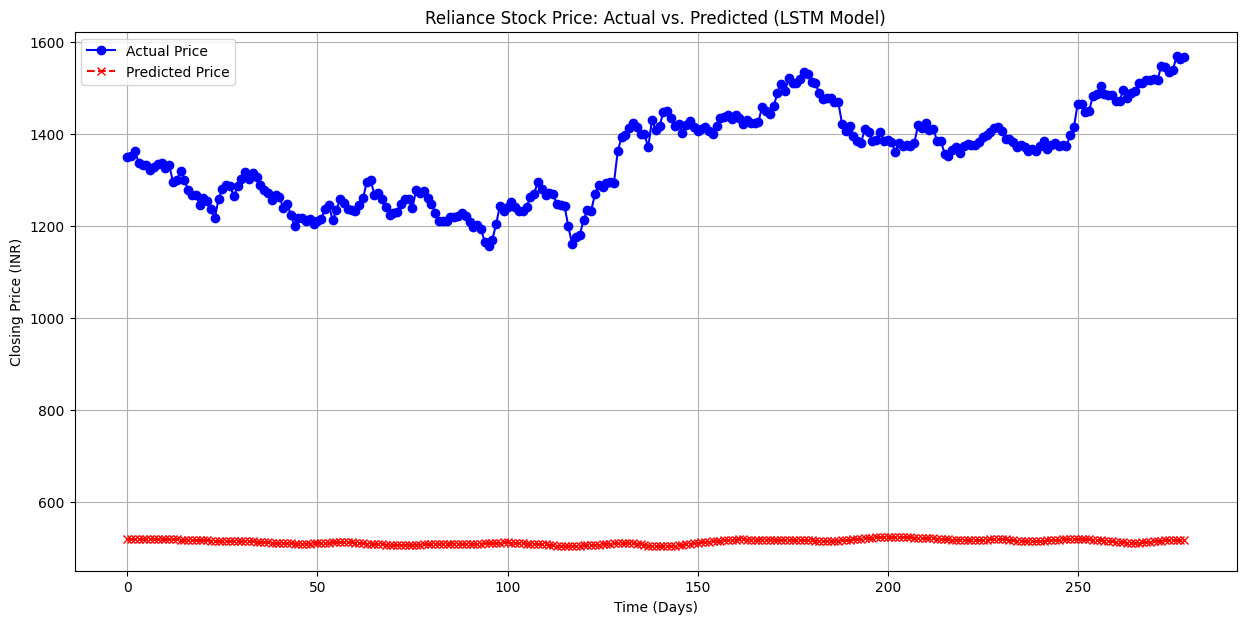

In [16]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# --- 1. Make Predictions on the Test Data ---
print("Making predictions on the test data...")
predictions_scaled = model.predict(X_test)

# --- 2. Inverse Scale the Predictions and Actuals ---
# We need to reshape the data to have 5 columns to match the scaler's input shape
# Create a dummy array with the same shape as the original data
dummy_array_pred = np.zeros((len(predictions_scaled), 5))
# Place our predictions into the first column (the 'Close' price column)
dummy_array_pred[:, 0] = predictions_scaled.ravel()
# Inverse transform the dummy array
predictions_actual = scaler.inverse_transform(dummy_array_pred)[:, 0]

# Do the same for the y_test actual values
dummy_array_actual = np.zeros((len(y_test), 5))
dummy_array_actual[:, 0] = y_test.ravel()
y_test_actual = scaler.inverse_transform(dummy_array_actual)[:, 0]
print("✅ Predictions have been converted back to actual Rupee values.")


# --- 3. Evaluate the Model's Performance ---
mae = mean_absolute_error(y_test_actual, predictions_actual)
r2 = r2_score(y_test_actual, predictions_actual)
print(f"\nModel Performance on Test Data:")
print(f"Mean Absolute Error (MAE): {mae:.2f} INR")
print(f"R-squared (R²) Score: {r2:.2f}")


# --- 4. Visualize the Results ---
plt.figure(figsize=(15, 7))
plt.plot(y_test_actual, label='Actual Price', color='blue', marker='o', linestyle='-')
plt.plot(predictions_actual, label='Predicted Price', color='red', marker='x', linestyle='--')
plt.title('Reliance Stock Price: Actual vs. Predicted (LSTM Model)')
plt.xlabel('Time (Days)')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.grid(True)
plt.savefig('lstm_prediction_vs_actual.png')
plt.show()

In [17]:
print("Starting model training... this will take several minutes.")

# Train the model
# epochs=50 means the model will see the entire dataset 50 times
# batch_size=32 means the model will look at 32 samples at a time
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

print("\n✅✅✅ Model training complete!")

Starting model training... this will take several minutes.
Epoch 1/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - loss: 0.3099

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2581

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2206

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1917

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1715

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1564

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1443

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1342

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1257

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1185

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1123

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1069

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1021

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0978

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0939

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0904

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0872

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0842

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0829 - val_loss: 0.0035


Epoch 2/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0050

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0074

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0077

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0075

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0074

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0073

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0072

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0072

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0072

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0072

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0071

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0071

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0070

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0070

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0070

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0069

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0069

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0069

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0069 - val_loss: 0.0013


Epoch 3/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0059

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0052

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0056

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0059

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0060

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0059

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0059

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0058

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0058

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0057

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0057

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0057

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0056

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0056

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0056

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0055

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0055

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0055

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0055 - val_loss: 0.0010


Epoch 4/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0042

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0049

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0052

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0053

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0053

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0054

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0053

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0053

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0053

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0053

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0053

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0053

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0053

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0052

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0052

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0052

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0051

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0051

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0051 - val_loss: 0.0024


Epoch 5/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0041

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0044

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0043

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0043

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0043

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0043

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0043

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0043

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0043

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0044

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0044

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0044

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0044

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0044

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0044

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0044

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0043

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0043

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0043 - val_loss: 0.0017


Epoch 6/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0040

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0038

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0038

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0040

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0041

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0041

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0042

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0042

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0042

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0042

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0042

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0042

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0042

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0043

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0043

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0043

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0043

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0043

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0043 - val_loss: 0.0033


Epoch 7/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0045

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0039

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0038

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0036

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0036

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0036

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0036

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0036

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0036

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0036

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0036

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0036

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0036

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0036

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0036

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0037

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0037

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0037

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0037 - val_loss: 0.0010


Epoch 8/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0047

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0041

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0038

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0038

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0037

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0038

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0038

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0039

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0039

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0039

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0039

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0039

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0039

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0039

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0040

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0040

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0040

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0040

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0040 - val_loss: 0.0011


Epoch 9/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0033

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0035

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0034

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0034

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0034

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0034

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0034

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0035

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0035

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0035

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0035

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0035

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0036

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0036

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0036

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0036

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0036

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0036

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0036 - val_loss: 0.0012


Epoch 10/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0028

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0029

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0029

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0030

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0030

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0031

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0033

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0033

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0033

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0033

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0033

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0033

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0033

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0033

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0034

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0034 - val_loss: 8.6386e-04


Epoch 11/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0033

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0034

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0034

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0034

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0034

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0034

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0033

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0033

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0033

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0033

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0032

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0032

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0032

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0032

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0032

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0032

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0032

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0032

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0032 - val_loss: 0.0017


Epoch 12/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0047

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0040

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0040

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0040

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0040

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0040

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0039

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0039

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0039

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0038

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0038

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0038

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0038

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0037

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0037

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0037

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0037

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0037

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0037 - val_loss: 0.0015


Epoch 13/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0037

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0036

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0035

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0034

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0033

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0033

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0033

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0033

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0032

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0032

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0032

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0033

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0033

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0033

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0033

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0033

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0033

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0033 - val_loss: 0.0026


Epoch 14/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0047

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0044

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0042

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0041

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0041

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0041

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0041

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0042

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0041

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0041

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0041

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0040

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0040

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0040

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0040

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0039

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0039

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0039

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0039 - val_loss: 0.0017


Epoch 15/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0041

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0048

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0046

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0045

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0044

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0044

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0043

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0043

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0042

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0042

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0042

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0041

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0041

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0041

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0041

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0040

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0040

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0040

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0039 - val_loss: 8.6012e-04


Epoch 16/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0054

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0043

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0040

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0039

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0039

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0039

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0039

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0039

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0039

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0038

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0038

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0038

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0038

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0037

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0037

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0037

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0037

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0037

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0037 - val_loss: 0.0012


Epoch 17/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0033

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0033

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0031

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0031

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0031

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0030

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0030

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0030

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0030

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0030

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0030

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0030

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0030

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0030

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0030

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0030

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0030

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0030

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0030 - val_loss: 0.0011


Epoch 18/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0039

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0036

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0034

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0034

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0033

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0033

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0033

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0033

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0033

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0033

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0033

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0034

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0034

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0034

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0034

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0034

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0034

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0034

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0034 - val_loss: 0.0011


Epoch 19/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0052

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0047

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0042

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0039

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0038

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0037

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0036

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0036

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0036

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0035

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0035

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0035

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0035

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0035

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0035

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0035

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0035

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0035

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0035 - val_loss: 0.0031


Epoch 20/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0022

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0030

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0030

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0030

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0031

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0031

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0031

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0031

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0031

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0031

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0031

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0031 - val_loss: 0.0012


Epoch 21/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0049

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0041

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0038

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0037

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0036

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0036

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0036

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0036

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0036

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0036

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0035

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0035

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0035

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0035

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0035

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0035

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0035

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0035

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0035 - val_loss: 8.0580e-04


Epoch 22/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0034

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0028 - val_loss: 8.3470e-04


Epoch 23/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0020

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0024

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0026

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0027

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0029 - val_loss: 7.0145e-04


Epoch 24/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0031

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0028

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0028

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0028

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0028

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0028

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0028 - val_loss: 7.4964e-04


Epoch 25/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0023

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0025

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0026

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0026

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0026

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0026

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0026

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0026

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0026

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0027

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0027

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0027

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0027

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0027

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0027

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0027

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0028 - val_loss: 0.0029


Epoch 26/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0033

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0032

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0034

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0034

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0034

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0034

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0033

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0033

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0033

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0031

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0031

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0031 - val_loss: 6.5917e-04


Epoch 27/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0033

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0032

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0031

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0031

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0031

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0031

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0031

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0031

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0030

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0030

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0030

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0030 - val_loss: 0.0013


Epoch 28/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0032

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0032

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0031

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0030

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0027

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0027

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0027

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0027

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0027

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0027 - val_loss: 6.5316e-04


Epoch 29/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0022

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0022

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0024

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0025

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0026

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0027

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0027

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0027

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0028 - val_loss: 7.7502e-04


Epoch 30/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0033

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0030

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0027

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0027

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0027

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0027

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0027

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0026

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0026

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0026

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0026 - val_loss: 6.5464e-04


Epoch 31/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0026

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0025

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0025

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0026

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0026

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0026

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0026

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0027

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0027

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0027

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0027

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0027

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0027

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0027

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0027

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0027

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0027

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0027

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0027 - val_loss: 0.0012


Epoch 32/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0030

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0028

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0027

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0026

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0026

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0026

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0026

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0026

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0025

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0025

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0025

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0025

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0025

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0025

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0025

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0025

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0025

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0025

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0025 - val_loss: 0.0021


Epoch 33/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0018

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0020

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0021

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0021

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0022

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0022

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0023

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0023

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0023

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0024

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0024

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0024

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0024

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0024

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0024

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0025

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0025

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0025

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0025 - val_loss: 8.1545e-04


Epoch 34/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0019

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0020

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0024

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0024

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0026

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0026

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0026

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0026 - val_loss: 6.4144e-04


Epoch 35/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0036

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0031

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0030

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0028 - val_loss: 0.0016


Epoch 36/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0041

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0034

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0035

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0034

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0034

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0033

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0033

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0032

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0032

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0030

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0030

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0030

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0030

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0029

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0029

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0029 - val_loss: 9.2071e-04


Epoch 37/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0019

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0018

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0018

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0018

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0018

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0019

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0019

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0019

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0019

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0019

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0019

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0019

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0020 - val_loss: 9.3835e-04


Epoch 38/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0014

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0024

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0025

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0025

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0025

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0025

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0025 - val_loss: 8.2792e-04


Epoch 39/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0031

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0030

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0029

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0029

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0029

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0029

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0029

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0027

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0027

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0027

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0027

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0027

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0027

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0027 - val_loss: 5.6961e-04


Epoch 40/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0023

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0026

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0026

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0026

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0025

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0025

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0025

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0025

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0025

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0025

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0024

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0024

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0024

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0024

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0024

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0024

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0024 - val_loss: 6.0358e-04


Epoch 41/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0020

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0021

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0022

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0022

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0022

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0022

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0022

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0022

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0022

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0022

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0022

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0022

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0022

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0022

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0022

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0022

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0022

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0022

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0022 - val_loss: 0.0011


Epoch 42/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0031

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0026

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0024

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0021 - val_loss: 7.1689e-04


Epoch 43/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0021

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0020

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0020

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0020

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0021

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0021

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0021

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0021

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0021

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0021

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0021

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0021

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0021

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0021

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0021

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0021

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0021 - val_loss: 7.2923e-04


Epoch 44/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0013

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0015

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0017

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0017

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0018

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0018

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0018

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0019

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0019

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0019

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0019

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0019

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0019

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0020 - val_loss: 0.0010


Epoch 45/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0032

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0027

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0026

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0024

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0024

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0024

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0024

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0024

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0023 - val_loss: 8.6561e-04


Epoch 46/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0022

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0024

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0022

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0022

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0022

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0022

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0022

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0022

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0022

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0022

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0022

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0022

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0022

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0022 - val_loss: 5.3501e-04


Epoch 47/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0016

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0017

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0018

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0019

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0019

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0019

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0019

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0020

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0021

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0021

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0021

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0021

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0021

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0021 - val_loss: 0.0019


Epoch 48/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0015

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0016

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0016

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0016

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0016

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0017

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0017

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0017

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0018

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0018

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0018

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0018

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0019

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0019

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0019

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0019

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0019

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0019

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0019 - val_loss: 0.0010


Epoch 49/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0011

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0014

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0015

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0016

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0017

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0018

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0018

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0018

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0019

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0019

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0020 - val_loss: 0.0012


Epoch 50/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0018

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0017

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0016

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0017

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0018

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0018

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0018

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0019

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0019

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0020 - val_loss: 0.0012



✅✅✅ Model training complete!


In [18]:
import joblib

# Save the trained LSTM model
model.save('lstm_model.h5')
print("✅ Model has been saved in .h5 format.")

# Save the scaler object
joblib.dump(scaler, 'scaler.pkl')
print("✅ Scaler has been saved to scaler.pkl.")

11/30/2025 03:13:02 AM - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


✅ Model has been saved in .h5 format.
✅ Scaler has been saved to scaler.pkl.
